# Ensemble Learning Based on Tree 基于树的集成学习算法

## (一)集成学习基本原理

### 1、集成学习是什么？

集成学习（Ensemble Learning）是训练出完成统一任务的多个不同的基模型，并综合这些基模型的预测结果做出最终预测，来获得比单独使用任何一种模型更好的预测性能。

每个机器学习模型都构建了一个基于一组假设的某种模型。当假设在数据上不成立时，这种归纳偏倚将导致误差。机器学习是一个不固定的过程，在有限的数据上，每个模型都可能收敛到不同的解。一般来说，我们可以通过性能调节使一个模型尽可能达到最高的准确率，但是调节本身就是一个复杂的任务，并且对最好的算法而言，也存在实例使其不能足够准确的可能。因此，单个模型可能会学得不够好（欠拟合/偏差高）或者太容易被训练集干扰（过拟合/方差高）。为了解决上述问题，可以采用组合不同机器学习模型的方式。不同的实例有各自匹配适用的模型，将多个模型组合起来可以互相弥补弱点，克服仅使用单一机器学习算法的弊端，从而在很大程度上提高整个模型的性能。特别是当单个模型的训练结果存在显著差异时，集成学习算法往往会产生更好的结果。

### 2、集成学习算法类型

常见的集成学习框架可以分为三种：装袋法（Bagging）、提升法（Boosting）和堆叠法（Stacking）。

|集成学习框架|Bagging|Boosting|Stacking|
|---|---|---|---|
|思路策略|并行训练多个弱模型→平均或投票|串行训练多个弱模型→逐步纠正错误→加权叠加|不同模型并行训练→融合输出|
|目的|更稳定、减少方差、不容易过拟合|更精细、减少偏差、逼近复杂模式|提升整体预测能力|
|数据采样|有放回随机采样|全量或加权采样|通常使用原始数据|
|基模型|一般相同（如树）|相同（如树）|可以完全不同（如SVM+NN+RF）|
|模型关系|并行、独立|串行、依赖|分层结构、顶层融合|
|训练方式|每个模型单独训练|每个模型拟合前面模型的错误|并行训练多个不同模型|
|最终输出|多数投票/平均|加权累加|元模型预测|
|典型算法|Random Forest|AdaBoost、GBDT、XGBoost|StackingClassifier、blender|

装袋法（Bagging）是构建许多独立的学习器，通过模型平均的方式组合使用（如加权平均，按多数票规则投票，归一化平均）。该技术为每个模型使用随机抽样，所以每个模型都不太一样。每个模型的输人使用有放回的抽样，所以模型的训练样本各不相同，进而通过不相关的学习器减少预测方差来降低误差。

提升法（Boosting）在对模型进行集成学习时，各个基学习器不是独立的，而是串行的，该方法串行地建立一些学习器，通过一定策略提升弱分类器效果，组合得到强分类器。该技术使用的逻辑是，后面预测器学习的是前面预测器的误差。每个学习器都在前一个学习器训练结果的基础上进行学习，以纠正前面模型的错误。因此，提升法通过叠加多个串行的学习器结果来逼近精细的复杂模式，从而减少预测偏差。

堆叠法（Stacking）是当初始训练数据学习出若干个基学习器后，将这几个学习器的预测结果作为新的训练集，来学习一个新的学习器。堆叠法的基础层通常包括不同的学习算法，可以有效改进预测。

## （二）集成学习的偏差与方差

### 1、模型的方差和偏差

设样本容量为$n$的训练集为$k$维随机变量的集合$(X_{1}, X_{2}, ..., X{k})_{n}$，那么机器学习模型是以这些随机变量为输入的随机变量函数，预测的结果也是随机变量$F_{n}(X_{1}, X_{2}, ..., X{k})$。训练样本的随机性带来了模型的随机性。

通常来说，强模型在训练集上预测准确度高（偏差低），但容易过拟合（方差高），而弱模型是在训练集上准确度低（偏差高），但防止过拟合能力强（方差低）。在Bagging和 Stacking中的基模型为强模型，而Boosting中的基模型为弱模型。

在集成学习Bagging和Boosting框架中，通过计算基模型的期望和方差我们可以得到集成模型整体的期望和方差。为了简化模型，我们假设基模型的期望为$\mu$，方差$\sigma^2$ ，基模型$i$的权重为$r_i$，两两模型间的相关系数$\rho$相等。由于Bagging和Boosting的基模型都是线性组成的，那么有：

集成模型的总体期望：
$$
\begin{aligned}
E(F) &=E\left(\sum_{i}^{m} r_{i} f_{i}\right) \\
&=\sum_{i}^{m} r_{i} E\left(f_{i}\right)
\end{aligned}
$$
集成模型的总体方差：
$$
\begin{aligned}
\operatorname{Var}(F) &=\operatorname{Var}\left(\sum_{i}^{m} r_{i} f_{i}\right) \\
&=\sum_{i}^{m} \operatorname{Var}\left(r_{i} f_{i}\right)+\sum_{i \neq j}^{m} \operatorname{Cov}\left(r_{i} f_{i}, r_{j} f_{j}\right) \\
&=\sum_{i}^{m} r_{i}^{2} \operatorname{Var}\left(f_{i}\right)+\sum_{i \neq j}^{m} \rho r_{i} r_{j} \sqrt{\operatorname{Var}\left(f_{i}\right)} \sqrt{\operatorname{Var}\left(f_{j}\right)} \\
&=m r^{2} \sigma^{2}+m(m-1) \rho r^{2} \sigma^{2}\\
&=m r^{2} \sigma^{2}(1-\rho)+m^{2}r^{2}\sigma^{2}\rho
\end{aligned}
$$

而集成模型的准确度可由偏差和方差共同决定：
$$
\text { Error }=\text { bias }^{2}+\text { var }+\xi
$$

### 2、Bagging的偏差和方差

对于Bagging而言，每个基模型的权重等于$r = \frac{1}{m}$，且期望近似相等，故我们可以得到：
$$
\begin{aligned}
E(F) &=\sum_{i}^{m} r_{i} E\left(f_{i}\right) \\
&=m \frac{1}{m} \mu \\
&=\mu
\end{aligned}
$$

$$
\begin{aligned}
\operatorname{Var}(F) &=m r^{2} \sigma^{2}+m(m-1) \rho r^{2} \sigma^{2}\\
&=\frac{\sigma^{2}(1-\rho)}{m}+\sigma^{2}\rho
\end{aligned}
$$

Bagging集成模型的期望近似于基模型的期望，这也就意味着Bagging集成模型的偏差和基模型的偏差近似。

Bagging集成模型的方差小于等于基模型的方差（当且仅当$m=1$时取等号）。随着基模型数量$m$的增多，集成模型的方差减少，从而防止过拟合的能力增强，模型的准确度得到提高。但当基模型数增加到一定程度时，方差会趋近于$\sigma^{2}\rho$，防止过拟合的能力达到极限。

由此可见，Bagging适用于强模型（偏差低，方差高），能通过随机抽样取平均的方式，降低其方差。

### 3、Boosting的偏差和方差

对于Boosting来说，由于基模型共用同一套训练集，所以基模型间具有强相关性，故模型间的相关系数近似等于1，针对Boosting化简公式为：
$$
E(F)=\sum_{i}^{m} r_{i} E\left(f_{i}\right)
$$
$$
\begin{aligned}
\operatorname{Var}(F) &=m r^{2} \sigma^{2}(1-\rho)+m^{2} r^{2} \sigma^{2} \rho \\
&=mr^{2} \sigma^{2}(1-1)+m^{2} r^{2} \sigma^{2} 1 \\
&=m^{2} r^{2} \sigma^{2}
\end{aligned}
$$

通过观察Boosting方差表达式我们容易发现，若Boosting基模型不是弱模型，其方差相对较大，这将导致整体模型的方差很大，即无法达到防止过拟合的效果。因此，Boosting框架中的基模型必须为弱模型。

基模型为弱模型，每个基模型的准确度都不是很高。但Boosting框架中采用基于贪心策略的前向加法，集成模型的期望由基模型的期望累加而成，所以随着基模型数的增多，集成模型的期望值偏差减小，集成模型的准确度提高，更接近真实值。

但是集成模型的准确度也不会随着基模型数量的增加而单调上升，因为随着训练的进行，Boosting集成的方差会变大，使得集成模型防止过拟合的能力变弱，最终导致了准确度反而有所下降。

## （三）Bagging and Random Forest

### 1、随机森林算法的原理
决策树对训练数据有很好的分类能力，但对未知的测试数据未必有好的分类能力，泛化能力弱，即可能发生过拟合现象。为了防止过拟合情况的发生，通常的解决方法是剪枝和随机森林。

如果想要得到较好的泛化性能，集成学习的基学习器应该尽可能的相互独立，而这可以通过对训练样本的进行采样，产生出若干个不同的数据集，从每个数据集中训练出一个基学习器，但如果每个基学习器只用到了一部分数据，可能会不足以产生有效的学习效果，因此需要相互有交叠的采样子集，这便是Bagging方法（Bootstrap AGGregatING）的思想。


![图示](Bagging.png)

随机森林作为Bagging方法的扩展变体，是用随机的方式建立一个森林，里面有很多决策树，随机森林的每一棵决策树之间是没有关联的。在得到森林之后，当有一个新的输入样本进入时，森林中的每一棵决策树分别判断样本特征，观测者根据决策树的判断结果预测样本类别。

随机森林的基本逻辑和步骤如下：

第一步，从样本集中用有放回抽样的方式随机选出$n$个样本。

第二步，从所有属性中随机选择$p$个属性（假设共有$m$个属性），选择最佳分割属性作为节点建立决策树，该过程中不需要剪枝。不剪枝的好处是能够减少偏差。

第三步，重复以上两步$t$次，即建立$t$棵决策树，这$m$棵决策树形成随机森林，通过投票表决结果，决定数据属于哪一类。

随机森林之所以可以取得更好的泛化性能，是因为子树构建时并未用到所有特征，仅随机选取部分变量（$p$个变量）作为候选的分裂变量。每次只随机抽样一部分特征变量，会增大偏差，但不同树被强迫使用不同的特征分裂，可以降低树之间的相关性，从而减少方差。森林中多数不相关的树预测的结果涵盖所有的情况，这些预测结果将会彼此抵消，而少数优秀树的预测的结果会从“噪音”中脱颖而出，做出好的预测。在偏差和方差的权衡中，随机森林以牺牲少量偏差为代价，换取更小的方差，从而降低模型总误差，提高预测性能。

![图示](RF.png)

### 2、随机森林算法实践

In [ ]:
## 导入需要的库
import pandas as pd
import numpy as np
from collections import defaultdict
import datetime
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### （1）产品召回预测

数据为某产品召回前调查，出于敏感信息保密原则，具体字段名称做了一定的替换。主要的字段有四个渠道的消费和时长以及和客服沟通的次数等。下面我们使用随机森林算法，根据产品召回前调查情况预测产品是否会被召回。

In [ ]:
## 读取数据
data = pd.read_csv('ProductRecall.csv', encoding='gbk')
data.head()

,业务1使用次数,渠道1时长,渠道1访问次数,渠道1消费,渠道2时长,渠道2访问次数,渠道2消费,渠道3时长,渠道3访问次数,渠道3消费,渠道4时长,渠道4访问次数,渠道4消费,与客服沟通次数,isrun
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [70]:
## 划分数据集
labels = np.array(data.pop("isrun"))
train, test, train_labels, test_labels = train_test_split(data, labels,
                                                          stratify = labels,
                                                          test_size = 0.3, # 按照训练集测试集7：3进行划分
                                                          random_state = 114)
train = train.fillna(train.mean())
test = test.fillna(test.mean()) # 以均值填充缺失
features = list(train.columns)

In [ ]:
## 建立随机森林模型
trees = RandomForestClassifier(
    n_estimators=20, # 树的数量为20
    random_state=114, # 设置随机种子
    criterion='gini', # 使用基尼系数作为划分标准
    max_features = 'sqrt' # 每棵树分裂时考虑的最大特征数为总特征数的平方根（提升整体模型的泛化能力）
    )
trees.fit(train, train_labels)

RandomForestClassifier(n_estimators=20, random_state=114)

In [72]:
## 查看建立的随机森林的具体信息
# 用于存储每棵树的节点数量和最大深度
n_nodes = []
max_depths = []
# 遍历随机森林中的每棵树
for ind_tree in trees.estimators_:
    n_nodes.append(ind_tree.tree_.node_count) # 获取该树的节点总数
    max_depths.append(ind_tree.tree_.max_depth) # 获取该树的最大深度
# 输出每棵树的节点数量和最大深度
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 379
Average maximum depth 19


森林中每棵树平均有379个节点，平均最大深度为19。

In [73]:
## 查看评价标准
# 获取预测为正类的概率
probs = trees.predict_proba(test)[:, 1]
# 获取最终的分类预测结果
predictions = trees.predict(test)
print(f'Test ACC Score: {accuracy_score(predictions, test_labels)}')
print(f'Test ROC AUC Score: {roc_auc_score(test_labels, probs)}')

Test ACC Score: 0.906
Test ROC AUC Score: 0.821895543456342


这里选用准确度和AUC作为评估标准，可以看到，随机森林预测的准确率为90.6%，AUC为0.821。

In [ ]:
# 查看特征重要性
fi_model = pd.DataFrame({
    'feature': features,
    'importance': trees.feature_importances_
    })
# 按importance降序排列，并显示前10个最重要的特征
fi_model = fi_model.sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
1,渠道1时长,0.149806
3,渠道1消费,0.148304
13,与客服沟通次数,0.132728
4,渠道2时长,0.078845
6,渠道2消费,0.078460
7,渠道3时长,0.056919
12,渠道4消费,0.051537
2,渠道1访问次数,0.048397
8,渠道3访问次数,0.047986
10,渠道4时长,0.045726


这是对因该变量分裂而导致的节点不纯度总减少量的相对度量，并对所有树进行平均。

对于产品是否需要被召回，影响最大的因子是“渠道1”的两个影响因素“时长”和“消费”，其次是“与客服沟通次数”。如果之后再有统一批次的数据，就可以通过上述训练的模型，判断是否需要召回商品。

### （2）姓名预测性别

使用某个竞赛网站的数据，主要包含两列，name列是参赛者姓名，gender列是参赛者的性别，其中1表示男性，0表示女性。下面我们使用随机森林算法，根据参赛者的姓名预测性别，最后再和真实的性别比对。

In [ ]:
## 读取数据
path = "D:\\VSCode\\Python_project\\机器学习\\name_and_gender\\"
f = open(path+'train.txt',encoding='utf-8')
data = pd.read_csv(f,header=0,sep=',') # 一个竞赛网站12万样本
data['name'] = data['name'].astype(str)
data['gender'] = data['gender'].astype(int)
print(data.shape)
data.head(10)
# 将data前1000行作为示例数据，并对其划分训练集和测试集 
data = data[0:1000]
data_train, data_test = train_test_split(data, test_size=0.3, random_state=666)  
print("随机挑选一部分进行建模：", data_train.shape)

(120000, 3)
随机挑选一部分进行建模： (700, 3)


In [76]:
## 提取数据中关于name的相关信息
# 将姓名转换为向量：所有姓名合并在一起，去重后构造姓名用字池向量
name_vec_total = list(data_train['name']) # 获取所有训练集中的姓名
name_vec_total = list(''.join(name_vec_total)) # 合并成一个长字符串
print("语料库原始总字数：", len(name_vec_total))
print("不重复字样本量：", len(set(name_vec_total)))
# 统计每个字的频率
freq = defaultdict(int)
for w in name_vec_total:
    freq[w] += 1
name_vec_total = [w  for w in name_vec_total if freq[w]>5] # 只保留频率大于5的字，去除低频字
name_vec_total = list(set(name_vec_total)) # 去重
print("剔除稀缺字后不重复字样本量：",len(set(name_vec_total)))
print("不重复姓名用字举例:",name_vec_total[0:20])
f = open(path+'name_vec_total_rf.txt','w',encoding='utf8')
f.write(';'.join(name_vec_total))
f.close()

语料库原始总字数： 1390
不重复字样本量： 780
剔除稀缺字后不重复字样本量： 17
不重复姓名用字举例: ['春', '海', '子', '佳', '希', '嘉', '雪', '文', '鹏', '昭', '涵', '清', '彩', '轩', '雨', '妍', '明']


In [77]:
## 具体姓名的用字以姓名用字池向量表示
def words2vec(inputSet):
    returnVec = [0] * len(name_vec_total) # 初始化一个与姓名字池等长的0向量
    for word in inputSet:
        if word in name_vec_total:
            returnVec[name_vec_total.index(word)] += 1 #如果字在字池中，找到其对应位置，将该位置+1
    return returnVec

name = list(data_train['name']) # 获取所有训练集中的姓名并转换成列表
name_vec = [words2vec(n) for n in name]  # 将所有姓名转为对应的姓名向量（嵌套列表）
gender_vec = list(data_train['gender'])

In [78]:
## 对模型超参数依次进行搜索和调参，并检验训练集预测准确率

# 调参树的数量（n_estimators）
param_test1 = {
   'n_estimators':list(range(3,50,2))
   }
gsearch1 = GridSearchCV(
   estimator = RandomForestClassifier(
      oob_score=True,   # 使用OOB分数（袋外数据）来估计泛化能力
      random_state=10
      ),
   param_grid = param_test1, # 网格搜索的参数范围
   scoring='roc_auc', # 用AUC值作为评分标准
   cv=5, # 5折交叉验证
   n_jobs=-1 # 使用所有CPU核心并行运算
   )
gsearch1.fit(name_vec,gender_vec)
print(gsearch1.best_params_) # 输出最优树的数量

# 调参树的最大深度（max_depth）和内部节点再划分所需最小样本数（min_samples_split）
param_test2 = {
   'max_depth':list(range(1,14,2)),
   'min_samples_split':list(range(5,201,20))
   }
gsearch2 = GridSearchCV(
   estimator = RandomForestClassifier(
      n_estimators=27,  # 树的数量设置为上一步的最优值
      oob_score=True,
      random_state=10
      ), 
   param_grid = param_test2,
   scoring='roc_auc', cv=5, n_jobs=-1
   )
gsearch2.fit(name_vec,gender_vec)
print(gsearch2.best_params_) # 输出最优max_depth和min_samples_split

# 调参内部节点再划分所需最小样本数（min_samples_split）和叶子节点最少样本数（min_samples_leaf）
# min_samples_split暂时无法确定，因为与决策树其他的参数存在关联。
param_test3 = {
   'min_samples_split':list(range(80,150,20)),
   'min_samples_leaf':list(range(10,60,10))
   }
gsearch3 = GridSearchCV(
   estimator = RandomForestClassifier(
      n_estimators=27,
      max_depth=13, # 树的最大深度设置为上一步的最优值
      max_features='sqrt',
      oob_score=True,
      random_state=10
      ),
   param_grid = param_test3,
   scoring='roc_auc', cv=5, n_jobs=-1
   )
gsearch3.fit(name_vec,gender_vec)
print(gsearch3.best_params_)

# 调参最大特征数（max_features）
param_test4 = {
   'max_features':list(range(3,20,2))
   }
gsearch4 = GridSearchCV(
   estimator = RandomForestClassifier(
      n_estimators=27,
      max_depth=13,
      min_samples_split=80,
      min_samples_leaf=10,
      oob_score=True,
      random_state=10
      ),
   param_grid = param_test4,
   scoring='roc_auc', cv=5, n_jobs=-1)
gsearch4.fit(name_vec,gender_vec)
print(gsearch4.best_params_)

# 依次调参最优模型
rf_clf_sequently = RandomForestClassifier(
   n_estimators=27,
   max_depth=13,
   min_samples_split=80,
   min_samples_leaf=10,
   max_features=3,
   oob_score=True,
   random_state=10
   )
rf_clf_sequently.fit(name_vec,gender_vec)
# 使用OOB数据估计训练集预测准确率
print("验证集预测准确率:",rf_clf_sequently.oob_score_)

{'n_estimators': 3}
{'max_depth': 7, 'min_samples_split': 5}
{'min_samples_leaf': 10, 'min_samples_split': 80}
{'max_features': 3}
验证集预测准确率: 0.5428571428571428


In [79]:
## 在测试集测试
name_new = list(data_test['name']) 
x_test = [words2vec(n) for n in name_new]   
y_test = list(data_test['gender'])
# 使用训练好的随机森林模型进行预测
y_pred_new = rf_clf_sequently.predict(x_test)
print("随机森林测试集准确率 {:05.2f}%".format(100 * accuracy_score(y_test, y_pred_new)))

随机森林测试集准确率 57.67%


In [80]:
## 网格搜索
param_test6 = {
    'n_estimators':list(range(3,50,2)), # 树的数量，从3到49，步长2
    'max_depth':list(range(1,14,2)), # 每棵树最大深度，从1到13
    'min_samples_split':list(range(5,201,10)), # 内部节点再划分所需最小样本数，从5到200
    'min_samples_leaf':list(range(10,60,10)), # 叶子节点最小样本数，从10到50
    'max_features':list(range(3,20,2)) # 每棵树随机选择的最大特征数，从3到19
    }
gsearch6 = GridSearchCV(
    estimator = RandomForestClassifier(oob_score=True, random_state=33),
    param_grid = param_test6, # 搜索的参数网格
    scoring='roc_auc',cv=5, n_jobs=-1
    )
gsearch6.fit(name_vec,gender_vec)
print(gsearch6.best_params_)

# 网格调参最优模型
best_params = gsearch6.best_params_
rf_clf_gridly = RandomForestClassifier(
    oob_score=True,
    random_state=10,
    **best_params  # 自动解包最优参数
)
rf_clf_gridly.fit(name_vec, gender_vec)
print("验证集预测准确率:", rf_clf_gridly.oob_score_)

{'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 3}
验证集预测准确率: 0.5257142857142857


In [81]:
# 在测试集进行预测
y_pred_new = rf_clf_gridly.predict(x_test)
print("随机森林测试集准确率 {:05.2f}%".format(100 * accuracy_score(y_test, y_pred_new)))

随机森林测试集准确率 57.67%


## (四)Boosting and AdaBoost, GBDT, XGBoost

### 1、AdaBoost算法的原理

AdaBoost（Adaptive Boosting）是Boosting算法的典型代表，其核心思想是通过迭代训练一系列弱分类器，每次都重新调整训练样本的权重，以便更加关注被错误分类的样本，从而不断提升模型性能。

![图示](AdaBoost.png)

在每一步迭代中，会给训练集样本赋予一个权重$(w_{1},w_{2},...,w_{n})$，样本的初始权重都相同，而在迭代时被先前弱分类器分错样本的权重会提高，被分对样本的权重则会降低。而弱分类器组合成强分类器的权重根据当前分类器的加权错误率来确定。

一般的，AdaBoost算法的训练过程如下：

（1）初始化样本权重$w_i(0) = \frac{1}{n}, i=1,2,\cdots,n $；

（2）弱分类器先使用训练样本$w_i(t)$训练分类器$g_t(x)$，然后计算当前弱分类器的误差$\varepsilon_i = \frac{\sum_{i=1}^{n} w_i \cdot I(y_i - g_t(x_i))}{\sum_{i=1}^{n} w_i}$;

（3）按照$\alpha_t = \frac{1}{2} \log \left( \frac{1 - \varepsilon_t}{\varepsilon_t} \right)$更新分类器权重；

（4）按照$w_{i}(t+1) = \frac{w_i(t) \exp(-\alpha_t y_i g_t(x_i))}{Z_t} $更新样本权重，其中$Z_t= \sum_{i=1}^{N} w_i(t)\exp(-\alpha_t g_t(x_i)) $；

（5）输出分类器$G(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t g_t(x) \right)$。

AdaBoost中每一个弱分类器的权重$\alpha_t$是根据该分类器在当前权重的训练样本下的分类效果来确定的。弱分类器的分类效果越好，该弱分类器的权重越高，否则越低。与单个弱分类器相比，AdaBoost往往能够有效提升分类精度，有较优的抗过拟合能力。但由于由于集成了多个弱分类器，模型的可解释性降低。且由于会不断纠正分类错误的样本，可能会过度拟合异常值或噪音数据，因此AdaBoost模型对于异常值比较敏感。

### 2、GBDT算法的原理

梯度提升回归树（Gradient Boosting Decision Tree，GBDT）也是一种Boosting算法。与AdaBoost不同的是，AdaBoost通过上一轮算法的结果调整样本权重和弱分类器权重后迭代训练得到强分类器，而GBDT通过将训练后得到的损失函数的负梯度作为残差的近似值，并以此作为新样本训练新的基学习器加入到模型中，最后得到强学习器。

GBDT属于加法模型，假设模型共迭代了$M$轮，每次训练一个基学习器$T_m(x)$，那么整体模型可以用线性组成式来表述：
$$ f_M(x)=\sum_{m=1}^{M} T_m(x) $$
根据上式，整体模型的训练目标是使预测值$f(x)$逼近真实值$y$，也就是说要让每一个基学习器的预测值逼近各自要预测的部分真实值。如果同时考虑所有基学习器，会导致整体模型的训练变成了一个非常复杂的问题。所以，研究者想到一个贪心的解决手段：每次只训练一个基学习器。于是，改写整体模型为迭代式：
$$f_m(x)=f_{m-1}(x)+T_m(x)$$
为了让每次迭代训练的基学习器尽可能逼近当前整体模型和真实值的差异，即训练基学习器$T_m(x)$使得整体损失函数最小化：
$$T_m(x)=\operatorname*{argmin}_{T \in H} \sum_{j=1}^{n} L\left( y_{j}, \, f_{m-1}(x_{j}) + T_{m}(x_{j}) \right)$$
使用梯度最速下降法来解决整体损失函数最小化的问题，沿着使目标函数下降最快的方向（即梯度的反方向），一步一步接近最小值点：
$$f_m(x) = f_{m-1}(x) - \eta_m \cdot \nabla L(f_{m-1}(x))$$
已知样本$x$的当前预测值为$f_m(x)$，下一步将预测值按照反向梯度，依照步长为$\eta_m$，进行更新：
$$f_m(x) = f_{m-1}(x) - \eta_m \cdot \frac{\partial L\left( y, \, f_{m-1}(x) \right) }{\partial f_{m-1}(x)}$$
这里的步长$\eta_m$不是固定值，而是设计为：
$$\eta_m=\operatorname*{argmin}_{\eta} \sum_{j=1}^{n} L\left( y_{j}, \, f_{m-1}(x_j) - \eta \cdot \frac{\partial L\left( y, \, f_{m-1}(x_j) \right) }{\partial f_{m-1}(x_j)} \right)$$
GBDT训练的过程就是使用基学习器不断拟合损失函数的负梯度，靠近目标函数的过程。

![图示](GBDT.png)

GBDT算法能够应对不同类型的数据，同时处理连续和离散数据，能够调节的参数较少且模型预测精度高。但是GBDT各基学习器之间是串行生成的，无法并行加速，当面对高维稀疏数据时，计算复杂度较高。

### 3、XGBoost算法的原理

XGBoost（eXtreme Gradient Boosting）是GBDT的一种高效实现，算法的性能非常好。XGBoost相对于GBDT做了以下的优化：

（1）GBDT在训练时，采用损失函数的负梯度只使用了损失函数的一阶导数，而XGBoost在训练时，对损失函数的二阶泰勒展开进行拟合，具有更小的误差。

（2）在损失函数中添加了正则项，减小过拟合的风险，泛化能力更强。

（3）XGBoost针对树形基学习器的分裂过程做了并行化处理，提升了算法整体的效率。

![图示](XGBoost.png)

XGBoost算法具有更高的精度，且支持自定义损失函数，只要损失函数一阶和二阶可导，这在解决不同问题的领域中具备更大的灵活性。XGBoost构建基学习器的过程可以并行，且工具包支持并行，提升了很大一部分性能。但其算法同样不适用于处理高维稀疏特征，且算法参数较多，调参复杂。

### 4、提升树算法实践（Adaboost, GBDT, XGBoost）

### （1）波士顿地区房屋价格预测

数据集来源于美国统计局收集波士顿地区的506个城镇的房屋市场信息和社会经济统计数据，特征变量有人均犯罪率、城镇中非零售商业用地所占比例、每套住宅的平均房间数、公路可达指数等。根据特征预测该地区的房价中位数。

In [1]:
## 导入需要的库
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [ ]:
## 读取数据
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [ ]:
## 划分训练集和测试集
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, Boston['medv'], test_size=0.3, random_state=0)

Bagging是特殊形式的随机森林，即训练多个使用到全部特征的决策树，无特征子集采样。

In [ ]:
## 创建Bagging模型
bag_boston = RandomForestRegressor(
    max_features=X_train.shape[1], # 每棵树使用所有特征
    random_state=0
    )
bag_boston.fit(X_train, y_train)

RandomForestRegressor(max_features=12, random_state=0)

14.634700151315787

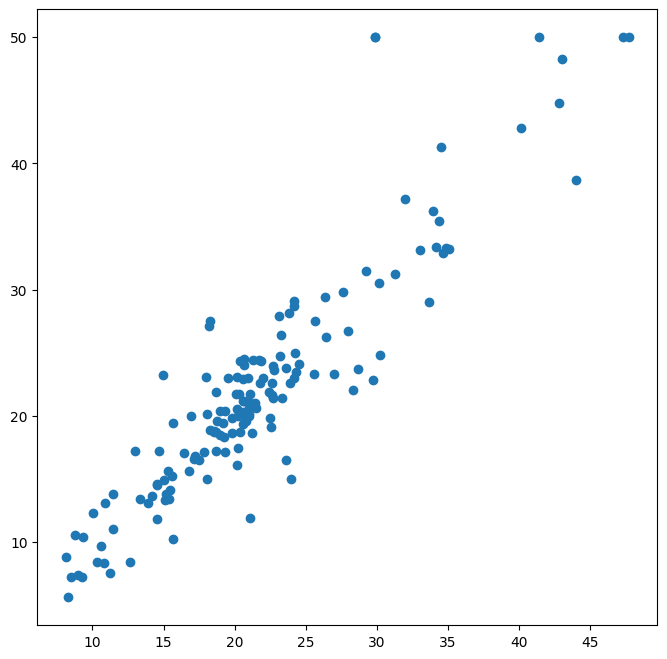

In [ ]:
# 绘制预测与真实房价的散点图
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test) # 横轴为模型预测房价，纵轴为真实房价
# 计算均方误差MSE
np.mean((y_test - y_hat_bag)**2)

将树的数量（n_estimators）由默认的参数100改为500。

In [ ]:
## 创建500棵树的Bagging模型
bag_boston = RandomForestRegressor(
    max_features=X_train.shape[1],
    n_estimators=500,
    random_state=0
    )
bag_boston.fit(X_train, y_train)

y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

14.605662565263161

均方误差的变化不大。Bagging和随机森林不会通过增加树的数量而导致过拟合，但如果树的数量太少，则可能导致欠拟合。

构建随机森林的过程完全相同，只是我们使用了较小的max_features参数值。默认情况下，RandomForestRegressor()在构建回归树的随机森林时使用$p$个变量（即默认使用 Bagging），而RandomForestClassifier()在构建分类树的随机森林时默认使用$\sqrt{p}$个变量。这里我们设置max_features等于6。

In [ ]:
## 创建随机森林模型
RF_boston = RandomForestRegressor(
    max_features=6,
    random_state=0
    )
RF_boston.fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF)**2)

20.04276446710527

测试集的均方误差为20.04，表明随机森林在本例中的表现略差于Bagging。

In [ ]:
## 查看特征重要性
feature_imp = pd.DataFrame(
    {'importance':RF_boston.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
lstat,0.356203
rm,0.332163
ptratio,0.067270
crim,0.055404
indus,0.053851
dis,0.041582
nox,0.035225
tax,0.025355
age,0.021506
rad,0.004784


结果表明，在随机森林中考虑的所有树中，社区的财富水平（“lstat”）和房屋大小（“rm”）是迄今为止最重要的两个变量。

In [ ]:
## 创建GBRT模型
boost_boston = GradientBoostingRegressor(
    n_estimators=5000, # 构建 5000 棵回归树，迭代次数
    learning_rate=0.001, # 每一步学习的步长（权重衰减），较小意味着学习更慢但更稳定
    max_depth=3, # 每棵回归树的最大深度，3是常用的默认值（防止过拟合）
    random_state=0
    )
boost_boston.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

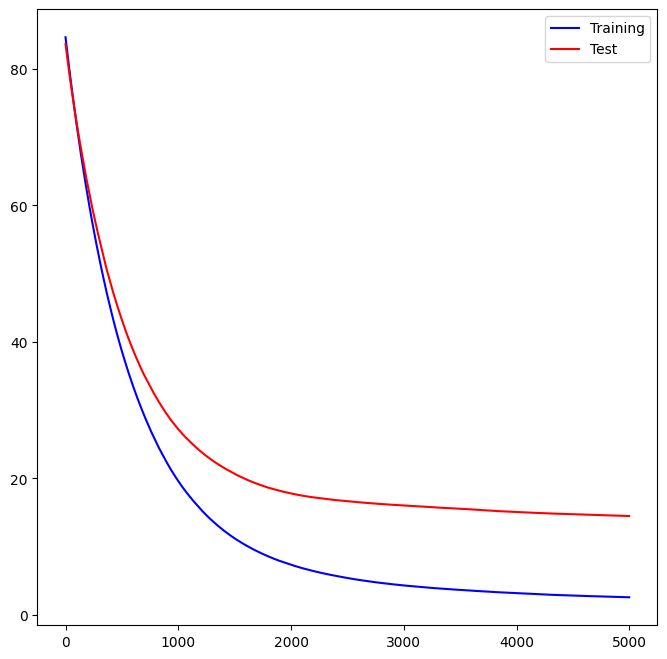

In [ ]:
## 绘制GBRT模型在训练过程中训练误差和测试误差的变化曲线
# 计算每一轮迭代的结果计算测试集均方误差
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
   test_error[idx] = np.mean((y_test - y_)**2)
# 绘图
plot_idx = np.arange(boost_boston.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_boston.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend()

In [ ]:
y_hat_boost = boost_boston.predict(X_test)
np.mean((y_test - y_hat_boost)**2)

14.501514553719565

GBRT模型在测试集上的均方误差为14.48，与Bagging结果相似。

改变模型学习率为0.2

提高学习率会使得模型收敛更快，并且需要的迭代次数（树的数量）可以减少。但如果学习率过高，可能导致过拟合或发散。

In [ ]:
boost_boston = GradientBoostingRegressor(
    n_estimators=5000,
    learning_rate=0.2, # 改变学习率为0.2
    max_depth=3,
    random_state=0
    )
boost_boston.fit(X_train, y_train)
y_hat_boost = boost_boston.predict(X_test)
np.mean((y_test - y_hat_boost)**2)

14.501514553719565

使用0.2学习率得到的均方误差与使用0.001学习率得到的结果几乎相同。

### （2）信用卡欺诈分类

数据集包含2013年9月欧洲持卡人的信用卡交易信息，需要对交易是否属于气站行为进行判定。该数据集显示了两天内发生的交易，其中284,807宗交易中只有492个欺诈。数据只包含数值的输入变量，是PCA变换后的结果。出于保密问题，没有提供原始特征和更多关于数据的背景信息。特征V1，V2，…，V28为主成分分析（PCA）得到的主成分；唯一没有使用PCA转换的特征是时间和数量，其中Feature Time包含每个事务与数据集中的第一个事务之间所经过的秒数，Amount指交易金额，Feature Class是标签变量，如果发生欺诈，它的值为1，否则为0。

In [ ]:
## 导入需要的库
import pandas as pd 
import numpy as np
import matplotlib
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
import gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score ,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

RANDOM_STATE = 42

In [83]:
## 读取数据
data = pd.read_csv("creditcard.csv")
print("Credit Card Fraud Detection data -  rows:",data.shape[0]," columns:", data.shape[1])
data.head()

Credit Card Fraud Detection data -  rows: 284807  columns: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [84]:
## 查看数据集的数据缺失情况
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


可以看到，数据集中不存在缺失数据。

In [85]:
## 按照是否被欺诈进行分类可视化
temp = data["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Blue"),
    text=df['values']
)
temp_data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=temp_data, layout=layout)
iplot(fig, filename='class')

可以看到，数据集中是存在数据不平衡性的，只有492条诈骗记录（占总样本的0.172%）。

In [86]:
## 对欺诈案例按照时间维度进行可视化
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

可以看到，欺诈交易分布的较为均匀，且容易在夜间持续发生。

In [87]:
## 划分训练集和测试集
TEST_SIZE = 0.20 # 划分为测试集的比例
train_df, test_df = train_test_split(data, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)

由于数据集中存在数据不平衡的现象，因此需要对训练数据进行平衡，通过对数量较多的非欺诈样本进行欠采样，将欺诈样本的比例提升到1%。

In [88]:
## 对非欺诈样本进行降采样
# 获得训练集欺诈样本数量
train_fraud_df  = train_df[train_df['Class'] ==1]
no_of_fraud = train_fraud_df.shape[0]
# 对非欺诈样本欠采样
no_of_non_fraud = no_of_fraud * 99
train_non_fraud_df = train_df[train_df['Class'] ==0].sample( no_of_non_fraud , random_state =RANDOM_STATE)
no_of_non_fraud = train_non_fraud_df.shape[0]
# 整合欠采样后的数据，打乱顺序
train_df = pd.concat([train_fraud_df, train_non_fraud_df] , axis =0 )
train_df = train_df.sample(frac = 1,random_state =RANDOM_STATE)

In [89]:
## 对目标列和特征列进行定义
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
              'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
              'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
              'Amount']

#### 1. AdaBoost模型的搭建与训练

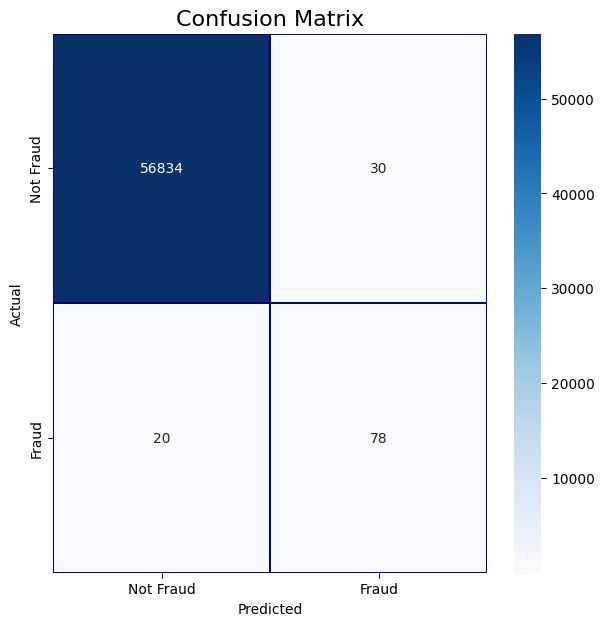

In [90]:
# 创建AdaBoost分类器
ada_clf = AdaBoostClassifier(random_state=RANDOM_STATE)
# 在训练集上训练模型
ada_clf.fit(train_df[predictors], train_df[target].values)
# 在测试集上进行预测
test_df['prediction'] = ada_clf.predict(test_df[predictors])
# 计算混淆矩阵
cm = pd.crosstab(test_df[target].values, test_df['prediction'], rownames=['Actual'], colnames=['Predicted'])
# 绘制混淆矩阵
fig, ax1 = plt.subplots(ncols=1, figsize=(7,7))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues" , fmt='d')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

结果如图所示。其中，56834个True Negative样本不是欺诈，模型预测它们不是欺诈；78个True Positive样本是欺诈，模型预测它们是欺诈；20个False Negative样本是欺诈，但模型未能预测它们是欺诈；30个False Positive样本不是欺诈，但模型预测它们是欺诈。

In [ ]:
## 建立表格来存储模型评估指标
metric_data = pd.DataFrame(columns =['Model Name','Detection Rate' ,'AUC','F1 Score','Accuracy','Fraud Loss Saved'])
# 定义财产损失保护金额的函数
def fraud_loss_saved ( dataset , key) :
    df = dataset.copy()
    total_fraud_amt = df[df['Class'] ==1]['Amount'].sum()
    print("Total Fraud Amount in Test Data : " +  str(round(total_fraud_amt,2)))
    total_fraud_amt_detected = df.loc[(df['prediction'] ==1) & (df['Class']==1) ]['Amount'].sum()
    print("Total Fraud Amount Detected in Test Data : " +  str(round(total_fraud_amt_detected,2)))
    print("Fraud Loss Saved (%): " + str(round(100*total_fraud_amt_detected/total_fraud_amt ,2)))
    detection_rate  = 100 * (df[df['prediction']==1]['Class'].sum())/df['Class'].sum()
    print("Detection Rate (%) : " + str(round(detection_rate , 2)))
    accuracy = 100*accuracy_score(df['Class'] ,df['prediction'])
    print("Accuracy : " + str(round(accuracy ,2)))
    f1 = f1_score(df['Class'] ,df['prediction'])
    print("F1 Score : " + str(round(f1 ,4)))   
    auc_score = roc_auc_score(df['Class'],df['prediction'])
    print("AUC Score : " + str(round(auc_score,4)))
    values = []
    values.append(key)
    values.append(detection_rate)
    values.append(auc_score)
    values.append(f1)
    values.append(accuracy)
    values.append(round(100*total_fraud_amt_detected/total_fraud_amt ,2))
    final_values =[]
    final_values.append(values)
    temp_df = pd.DataFrame(final_values ,columns =['Model Name', 'Detection Rate', 'AUC', 'F1 Score', 'Accuracy', 'Fraud Loss Saved'])
    global metric_data
    metric_data = pd.concat([metric_data,temp_df], axis=0)

In [93]:
fraud_loss_saved(test_df ,'AdaBoost - Test Data')

Total Fraud Amount in Test Data : 16078.4
Total Fraud Amount Detected in Test Data : 12019.13
Fraud Loss Saved (%): 74.75
Detection Rate (%) : 79.59
Accuracy : 99.91
F1 Score : 0.7573
AUC Score : 0.8977


可以看到，AdaBoost模型能够帮助我们保护的金额为12019.13，帮助我们识别79.59%的欺诈行为，同时F1值达到0.7573，说明模型精准度较好。

#### 2. GBDT模型的搭建与训练

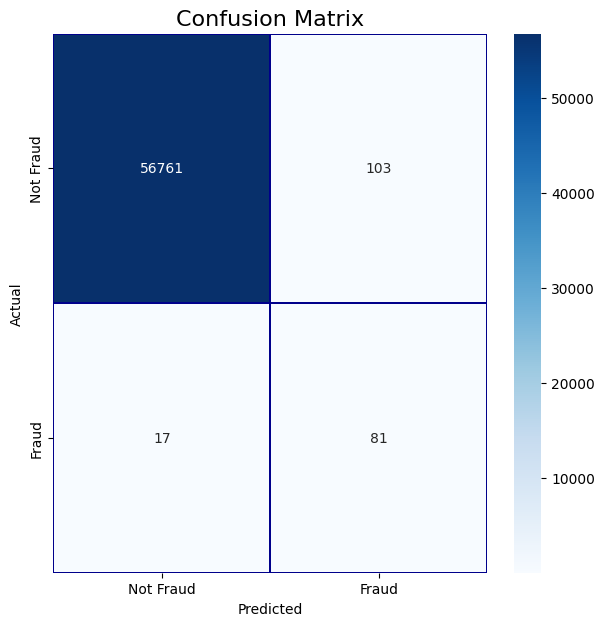

In [ ]:
# 创建GBDT模型
gbdf_clf = GradientBoostingClassifier(random_state=RANDOM_STATE)
# 在训练集上训练模型
gbdf_clf.fit(train_df[predictors], train_df[target].values)
# 在测试集上进行预测
test_df['prediction'] = gbdf_clf.predict(test_df[predictors])
# 计算混淆矩阵
cm = pd.crosstab(test_df[target].values, test_df['prediction'], rownames=['Actual'], colnames=['Predicted'])
# 绘制混淆矩阵
fig, ax1 = plt.subplots(ncols=1, figsize=(7,7))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues" , fmt='d')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [95]:
fraud_loss_saved(test_df ,'GBDT - Test Data')

Total Fraud Amount in Test Data : 16078.4
Total Fraud Amount Detected in Test Data : 12252.02
Fraud Loss Saved (%): 76.2
Detection Rate (%) : 82.65
Accuracy : 99.79
F1 Score : 0.5745
AUC Score : 0.9124


使用GBDT模型所保护的金额为12252.02，帮助我们识别82.65%的欺诈行为.可以看到GBDT相比于AdaBoost模型虽然F1值有所下降，但是欺诈检测金额和检测率都有所上升。

#### 3. XGBoost模型的搭建与训练

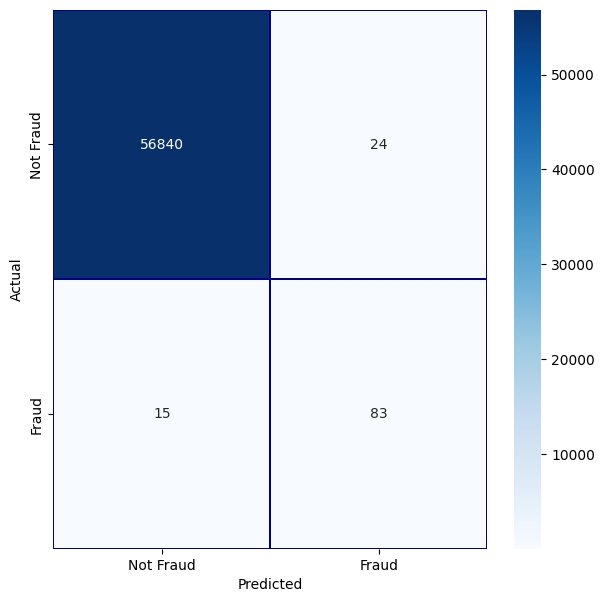

In [ ]:
# 创建XGBoost模型
xgb_clf = XGBClassifier(random_state=RANDOM_STATE)
# 在训练集上训练模型
xgb_clf.fit(train_df[predictors], train_df[target].values)
# 在测试集上进行预测
test_df['prediction'] = xgb_clf.predict(test_df[predictors])
# 计算混淆矩阵
cm = pd.crosstab(test_df[target].values, test_df['prediction'], rownames=['Actual'], colnames=['Predicted'])
# 绘制混淆矩阵
fig, ax1 = plt.subplots(ncols=1, figsize=(7,7))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues" , fmt='d')
plt.show()

In [97]:
fraud_loss_saved(test_df ,'XGBoost - Test Data')

Total Fraud Amount in Test Data : 16078.4
Total Fraud Amount Detected in Test Data : 12387.06
Fraud Loss Saved (%): 77.04
Detection Rate (%) : 84.69
Accuracy : 99.93
F1 Score : 0.8098
AUC Score : 0.9233


可以看到相对于AdaBoost和GBDT，XGBoost模型能够取得更好的效果，帮助我们更好地识别欺诈行为，保护更多财产。使用XGBoost模型能够检测出更多的欺诈行为，欺诈行为的检测率提升到了83.67%，总体的F1值也提升到了0.8241，各指标都明显提升。

#### 4. 三种提升树模型对比

In [98]:
metric_data

,Model Name,Detection Rate,AUC,F1 Score,Accuracy,Fraud Loss Saved
0,AdaBoost - Test Data,79.591837,0.897695,0.757282,99.912222,74.75
0,GBDT - Test Data,82.653061,0.912360,0.574468,99.789333,76.20
0,XGBoost - Test Data,84.693878,0.923258,0.809756,99.931533,77.04


可以看到，在三种提升树模型中，XGBoost模型具有最好的效果，能够更加准确地识別出欺诈行为，进而帮助我们保护更多的财产。